In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("D:/Excel/Dataset .csv")
df.head(2)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


**Task: Restaurant Chains**

Identify if there are any restaurant chains present in the dataset.

In [5]:
# Count the number of restaurants
restaurant_count=df['Restaurant Name'].value_counts()
restaurant_count
# Identify chains
restaurant_chain=restaurant_count[restaurant_count >1]
print("Restaurant Chains in the Dataset:")
print(restaurant_chain)

Restaurant Chains in the Dataset:
Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


In [6]:
# count unique locations
restaurant_location=df.groupby('Restaurant Name')['Locality'].nunique()

restaurant_chain=restaurant_location[restaurant_location > 1]
print("Restaurant Chains with Multiple Locations:")
print(restaurant_chain)

Restaurant Chains with Multiple Locations:
Restaurant Name
10 Downing Street        2
221 B Baker Street       3
34 Parkstreet Lane       2
34, Chowringhee Lane    12
4700BC Popcorn           2
                        ..
Zaika                    3
Zaika Kathi Rolls        2
Zizo                     3
Zooby's Kitchen          2
bu��no                   2
Name: Locality, Length: 706, dtype: int64


Analyze the ratings and popularity of different restaurant chains.

In [7]:
#Average rate of each chain
df_chain=df[df['Restaurant Name'].isin(restaurant_chain.index)]
chain_ratings=df_chain.groupby('Restaurant Name')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average Ratings of Restaurant Chains:")
print(chain_ratings)

Average Ratings of Restaurant Chains:
Restaurant Name
Talaga Sampireun              4.900
AB's Absolute Barbecues       4.850
Silantro Fil-Mex              4.850
AB's - Absolute Barbecues     4.825
Naturals Ice Cream            4.800
                              ...  
OCD - Online Cake Delivery    0.000
Night Munchers                0.000
Biryani Express               0.000
Murliwala Bakers              0.000
Firangi Bake                  0.000
Name: Aggregate rating, Length: 706, dtype: float64


In [8]:
chain_popularity=df_chain.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)
print("Most Popular Restaurant Chains (Based on Votes):")
print(chain_popularity)

Most Popular Restaurant Chains (Based on Votes):
Restaurant Name
Barbeque Nation              28142
AB's - Absolute Barbecues    13400
Big Chill                    10853
Farzi Cafe                   10098
Truffles                      9682
                             ...  
Bake Walkers                     0
Aap Ki Khatir                    0
Chinese Fast Food                0
Bikaner Misthan Bhandar          0
Dev Food                         0
Name: Votes, Length: 706, dtype: int64


**Task: Restaurant Reviews**

Analyze the text reviews to identify the most common positive and negative keywords.

In [9]:
df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [10]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from textblob import TextBlob
#nltk.download('all')
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)  
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word not in stopwords.words('english')]  
    return tokens

# Tokenize and preprocess reviews
all_words = []
word_sentiments = {}

for review in df['Rating text']:
    tokens = preprocess_text(review)
    all_words.extend(tokens)
    
    
    for word in tokens:
        sentiment = TextBlob(word).sentiment.polarity
        word_sentiments[word] = sentiment

# Categorize words 
positive_words = [word for word, score in word_sentiments.items() if score > 0]
negative_words = [word for word, score in word_sentiments.items() if score < 0]


common_positive = Counter(positive_words).most_common(5)
common_negative = Counter(negative_words).most_common(5)

print("Most Common Positive Keywords:", common_positive)
print("Most Common Negative Keywords:", common_negative)


Most Common Positive Keywords: [('excellent', 1), ('good', 1)]
Most Common Negative Keywords: [('average', 1), ('poor', 1)]


Calculate the average length of reviews and explore if there is a relationship between review length and rating.



Average Review Length: 1.34 words


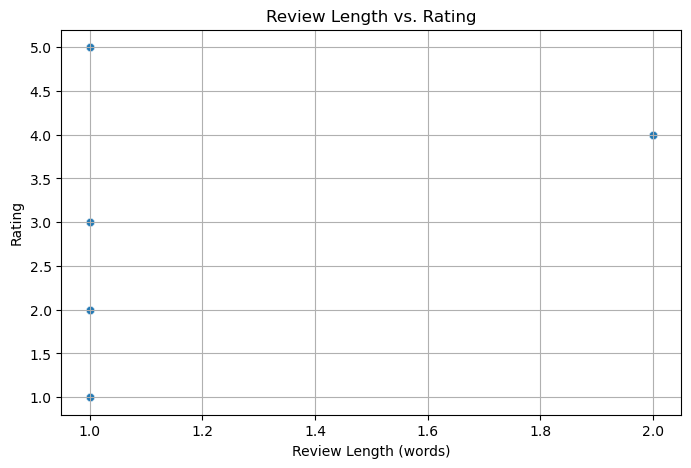

Correlation between Review Length and Rating: nan


In [11]:
# converted to numerical ratings
rating_mapping = {
    "Excellent": 5,
    "Very Good": 4,
    "Good": 3,
    "Average": 2,
    "Poor": 1
}
df["Numeric_Rating"] = df["Rating text"].map(rating_mapping)

# Calculate review length
df["Review_Length"] = df["Rating text"].apply(lambda x: len(word_tokenize(x)))

#Average review length
avg_length = df["Review_Length"].mean()
print(f"Average Review Length: {avg_length:.2f} words")

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Review_Length"], y=df["Numeric_Rating"], alpha=0.7)
plt.xlabel("Review Length (words)")
plt.ylabel("Rating")
plt.title("Review Length vs. Rating")
plt.grid()
plt.show()

# Calculate correlation between Review Length and Rating
correlation = np.corrcoef(df["Review_Length"], df["Numeric_Rating"])[0, 1]
print(f"Correlation between Review Length and Rating: {correlation:.2f}")


**Task: Votes Analysis**


Identify the restaurants with the highest and lowest number of votes.

In [12]:
Restaurant_votes=df.groupby('Restaurant Name')['Votes'].sum()
Highest_votes_Restaurant=Restaurant_votes.idxmax()
Highest_votes=Restaurant_votes.max()
Lowest_votes_Restaurant=Restaurant_votes.idxmin()
Lowest_votes=Restaurant_votes.min()
print(f'Highest_votes restaurant is {Highest_votes_Restaurant} with {Highest_votes} votes')
print(f'Lowest_votes restaurant is {Lowest_votes_Restaurant} with {Lowest_votes} votes')

Highest_votes restaurant is Barbeque Nation with 28142 votes
Lowest_votes restaurant is #hashtag with 0 votes


Analyze if there is a correlation between the number of votes and the rating of a restaurant

correlation between the number of votes and the rating of a restaurant is                      Votes  Aggregate rating
Votes             1.000000          0.313691
Aggregate rating  0.313691          1.000000


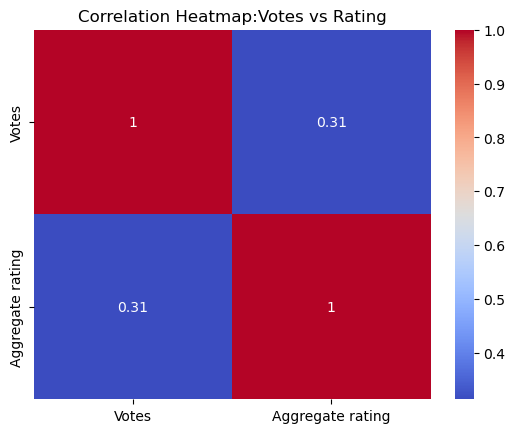

In [13]:
correlation=df[['Votes','Aggregate rating']].corr()
print(f'correlation between the number of votes and the rating of a restaurant is {correlation}')
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap:Votes vs Rating")
plt.show()

**Conclusion**:Since 0.3137 is a positive but weak correlation, this suggests that restaurants with more votes tend to have slightly higher ratings, but the relationship is not strong.

**Task: Price Range vs. Online Delivery andTable Booking**


Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

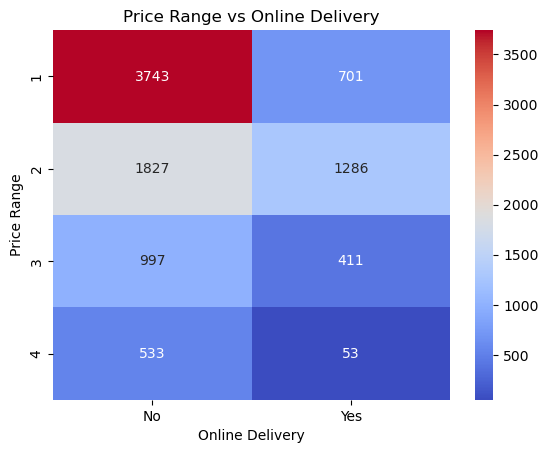

In [14]:
price_online = pd.crosstab(df['Price range'], df['Has Online delivery'])
sns.heatmap(price_online, annot=True, cmap="coolwarm", fmt="d")
plt.title("Price Range vs Online Delivery")
plt.ylabel("Price Range")
plt.xlabel("Online Delivery")
plt.show()


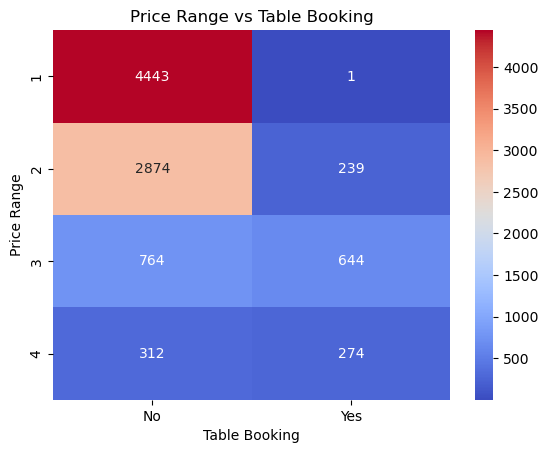

In [15]:
price_table = pd.crosstab(df['Price range'], df['Has Table booking'])
sns.heatmap(price_table, annot=True, cmap="coolwarm", fmt="d")
plt.title("Price Range vs Table Booking")
plt.ylabel("Price Range")
plt.xlabel("Table Booking")
plt.show()


**Conclusion** Online Delivery is more common in lower-priced restaurants.
Table Booking is more common in higher-priced restaurants.
Higher-priced restaurants prioritize customer experience and dining ambiance, while lower-priced ones focus on convenience.

Determine if higher-priced restaurants are  more likely to offer these services.

In [16]:
import pandas as pd
import scipy.stats as stats

# Contingency tables
online_delivery_ct = pd.crosstab(df['Price range'], df['Has Online delivery'])
table_booking_ct = pd.crosstab(df['Price range'], df['Has Table booking'])

# Chi-square test 
chi2_online, p_online, dof_online, expected_online = stats.chi2_contingency(online_delivery_ct)
chi2_table, p_table, dof_table, expected_table = stats.chi2_contingency(table_booking_ct)


print(f"Chi-Square Test for Online Delivery vs Price Range: p-value = {p_online:.5f}")
if p_online < 0.05:
    print("There is a significant relationship between price range and online delivery.")
else:
    print("No significant relationship between price range and online delivery.")

print(f"\nChi-Square Test for Table Booking vs Price Range: p-value = {p_table:.5f}")
if p_table < 0.05:
    print("There is a significant relationship between price range and table booking.")
else:
    print("No significant relationship between price range and table booking.")


Chi-Square Test for Online Delivery vs Price Range: p-value = 0.00000
There is a significant relationship between price range and online delivery.

Chi-Square Test for Table Booking vs Price Range: p-value = 0.00000
There is a significant relationship between price range and table booking.


Conclusion from Chi-Square Test
Since the p-value = 0.00000 (which is less than 0.05), we reject the null hypothesis for both tests:

Price Range vs Online Delivery:
→ There is a significant relationship between price range and online delivery. This suggests that higher-priced restaurants are more or less likely to offer online delivery compared to lower-priced ones.

Price Range vs Table Booking:
→ There is a significant relationship between price range and table booking. This means that the availability of table booking varies significantly with price range.